In [12]:
import pandas as pd

df = pd.read_csv('jaws.csv')
print(len(df))
df.head()

3171


,ID,Title,Post,Type,Tag1,Tag2,Help,Problem,Answer,Clarification,Elaboration,Junk
0,1,": a history of jaws and windows, was: training...","hi all , i do have an old single speaker that ...",original,original,NaN,undefined,undefined,undefined,Clarification,undefined,undefined
1,2,?luck with kindle?,has anyone had any luck using kindle for pc fr...,original,tagged,NaN,undefined,undefined,undefined,undefined,undefined,Junk
2,3,?luck with kindle?,anyone have any luck using kindle for pc by am...,original,tagged,NaN,undefined,undefined,undefined,undefined,undefined,Junk
3,4,?luck with kindle?,no i never had any success with the ap for pc!...,following,tagged,NaN,undefined,undefined,undefined,undefined,undefined,Junk
4,5,?luck with kindle?,yes you have to download the kindle for pc wit...,following,tagged,NaN,undefined,undefined,undefined,undefined,undefined,Junk


In [13]:
def assign_tag(row):
    h, p, a, c, e, j = row[6], row[7], row[8], row[9], row[10], row[11]
    
    if h == 'Help' or p == 'Problem':
        return 'Help'
    elif a == 'Answer' or e == 'Elaboration':
        return 'Answer'
    return 'Junk'

In [14]:
df['Tag'] = df.apply(assign_tag, axis= 1)

In [15]:
df.head()

,ID,Title,Post,Type,Tag1,Tag2,Help,Problem,Answer,Clarification,Elaboration,Junk,Tag
0,1,": a history of jaws and windows, was: training...","hi all , i do have an old single speaker that ...",original,original,NaN,undefined,undefined,undefined,Clarification,undefined,undefined,Junk
1,2,?luck with kindle?,has anyone had any luck using kindle for pc fr...,original,tagged,NaN,undefined,undefined,undefined,undefined,undefined,Junk,Junk
2,3,?luck with kindle?,anyone have any luck using kindle for pc by am...,original,tagged,NaN,undefined,undefined,undefined,undefined,undefined,Junk,Junk
3,4,?luck with kindle?,no i never had any success with the ap for pc!...,following,tagged,NaN,undefined,undefined,undefined,undefined,undefined,Junk,Junk
4,5,?luck with kindle?,yes you have to download the kindle for pc wit...,following,tagged,NaN,undefined,undefined,undefined,undefined,undefined,Junk,Junk


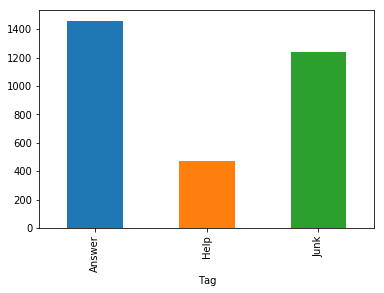

<Figure size 1440x720 with 0 Axes>

In [16]:
from matplotlib import pyplot as plt

df.groupby('Tag')['Post'].count().plot.bar(ylim=0)
plt.figure(figsize=(20,10))
plt.show()

In [18]:
df = df[df.Tag != 'Junk']

In [19]:
df.to_csv('jaws_to_es.csv')